In [67]:
%run ../scripts/imports.py
import mne
from pathlib import Path

Succesfully imported libraries and modules



In [68]:
with open('../path_data.txt', 'r') as f:
    data_path = Path(f.readline())

SFREQ = 2000
data_path

WindowsPath('C:/Users/aleks/Downloads/data_pac')

In [69]:
patient_path = data_path / 'Patient7'
patient_path

WindowsPath('C:/Users/aleks/Downloads/data_pac/Patient7')

In [70]:
fname = "Akhmetshin_OFF_5_eyes_closed_marked_bip.fif"

### Examining raw data

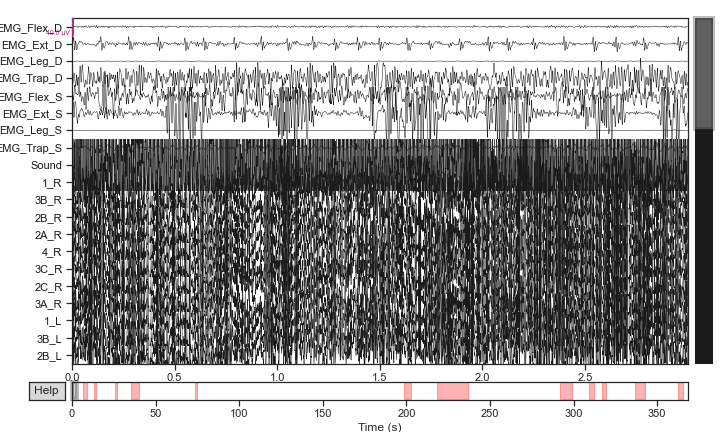

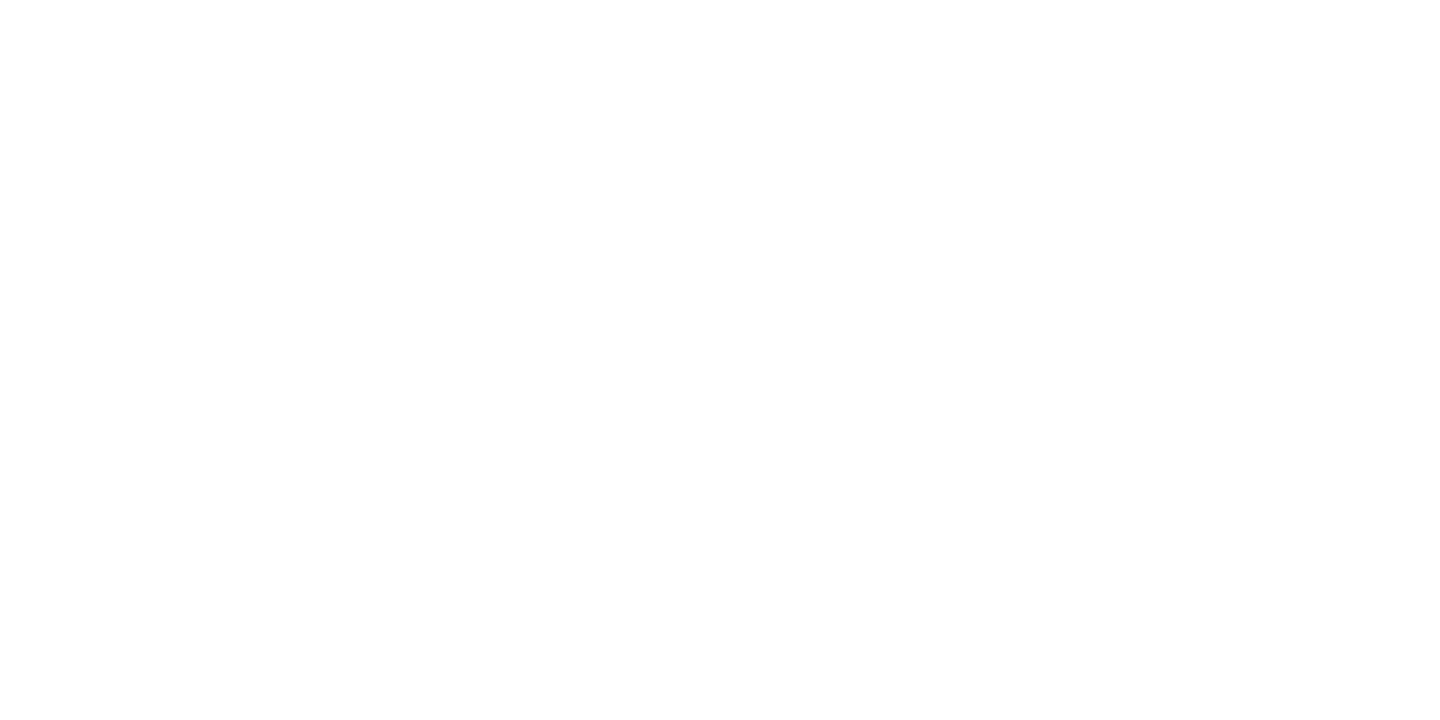

In [72]:
%matplotlib widget
#plt.figure(figsize=(20, 10))
i_patient = 7
patient_path = data_path / f"Patient{i_patient}"
fpath = patient_path / "Akhmetshin_ON_1_eyes_closed_marked_bip.fif"
raw = mne.io.read_raw_fif(fpath, verbose='ERROR')
raw.plot(duration=3);

### Assessing .fif files for length of BAD segments

### Cross-electrode correlation plots

In [79]:
# monopolar
raw.info['ch_names'][9:25]

['1_R',
 '3B_R',
 '2B_R',
 '2A_R',
 '4_R',
 '3C_R',
 '2C_R',
 '3A_R',
 '1_L',
 '3B_L',
 '2B_L',
 '2A_L',
 '4_L',
 '3C_L',
 '2C_L',
 '3A_L']

C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_OFF_1_eyes_closed_marked_bip.fif
Duration:  277.854
(62, 555708)
Good segment duration:  277.854


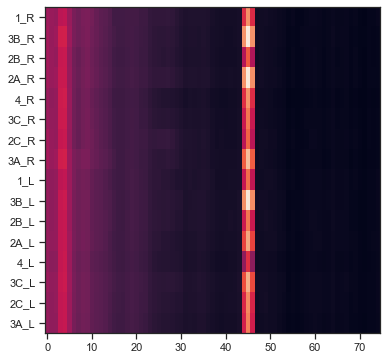

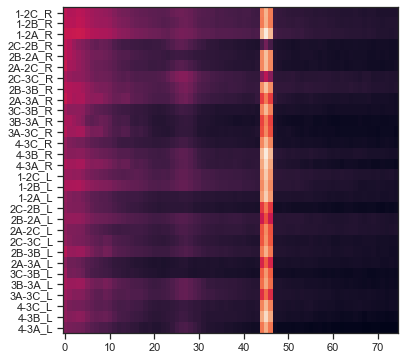

C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_OFF_5_eyes_closed_marked_bip.fif
Duration:  212.753
(62, 401526)
Good segment duration:  200.763


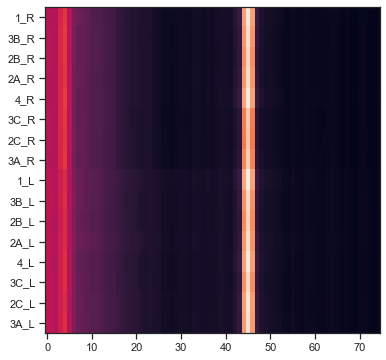

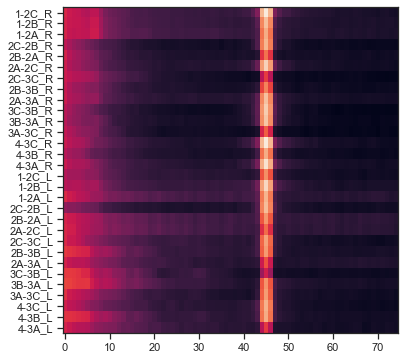

C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_ON_1_eyes_closed_marked_bip.fif
Duration:  368.204
(62, 624168)
Good segment duration:  312.084


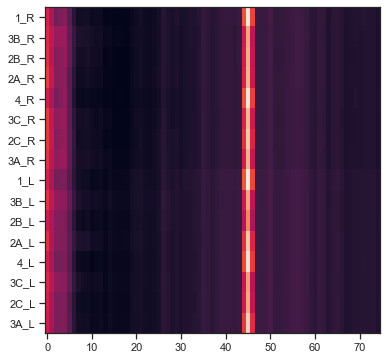

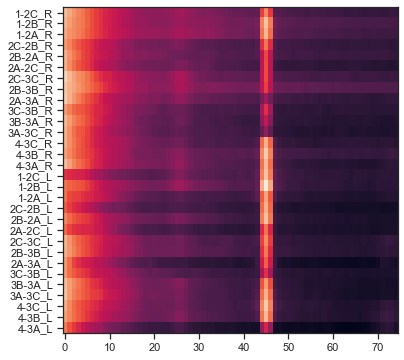

C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_ON_5_eyes_closed_marked_bip.fif
Duration:  320.579
(62, 478218)
Good segment duration:  239.109


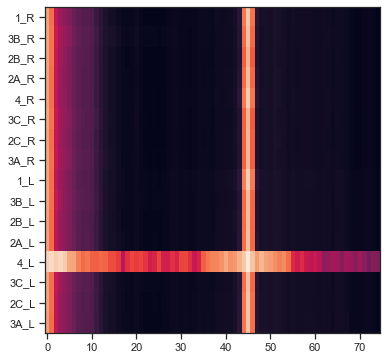

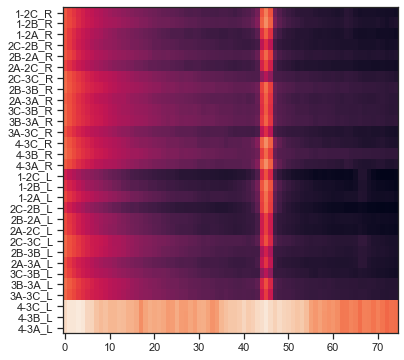

C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_OFF_1_eyes_closed_marked_bip.fif
Duration:  312.329
(62, 624658)
Good segment duration:  312.329


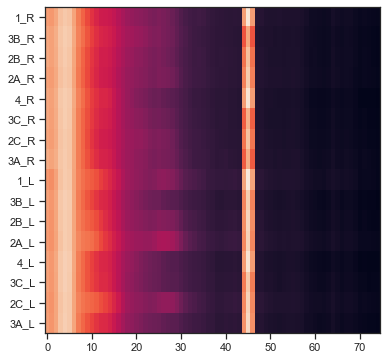

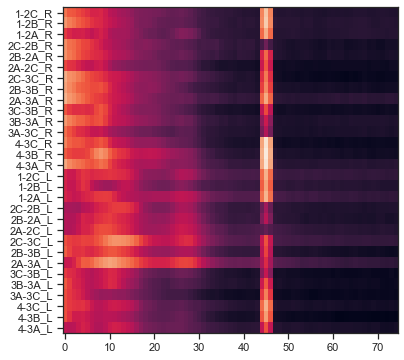

C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_OFF_5_eyes_closed_marked_bip.fif
Duration:  330.752
(62, 651344)
Good segment duration:  325.672


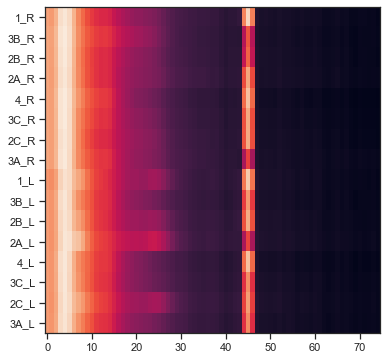

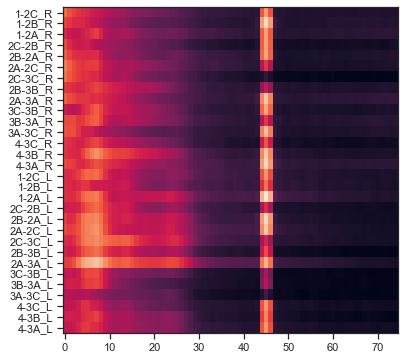

C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_ON_1_eyes_closed_marked_bip.fif
Duration:  283.454
(62, 554068)
Good segment duration:  277.034


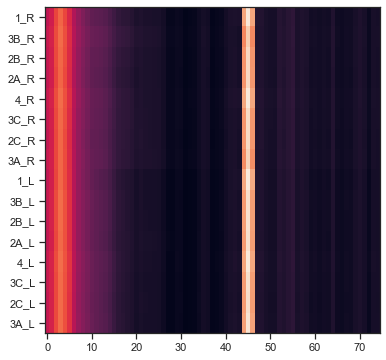

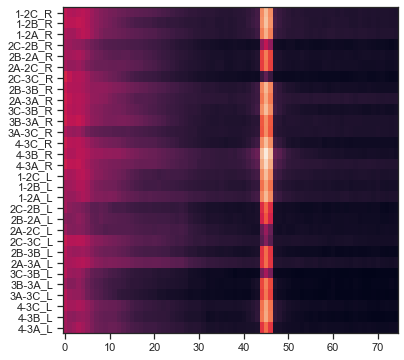

C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_ON_5_eyes_closed_marked_bip.fif
Duration:  289.029
(62, 578058)
Good segment duration:  289.029


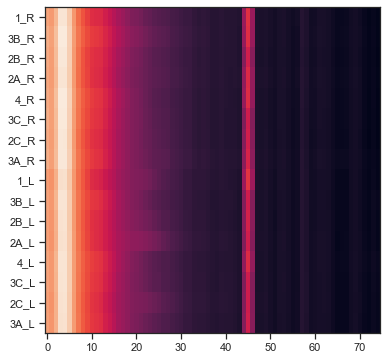

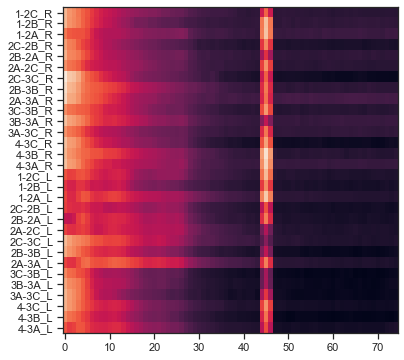

C:\Users\aleks\Downloads\data_pac\Patient9\Kulagina_OFF_1_eyes_closed_marked_bip.fif
Duration:  331.355
(62, 662710)
Good segment duration:  331.355


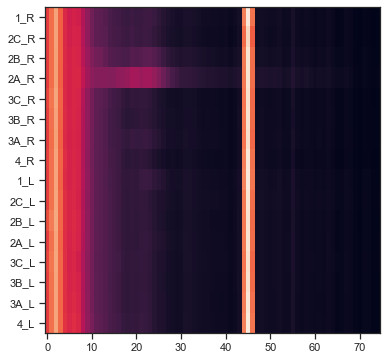

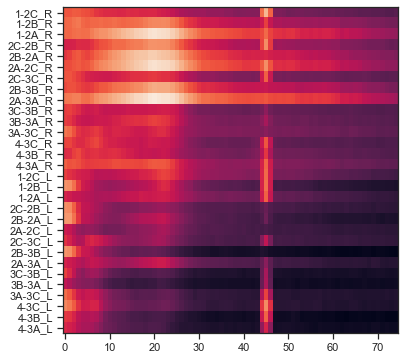

C:\Users\aleks\Downloads\data_pac\Patient9\Kulagina_OFF_5_eyes_closed_marked_bip.fif
Duration:  290.178
(62, 580356)
Good segment duration:  290.178


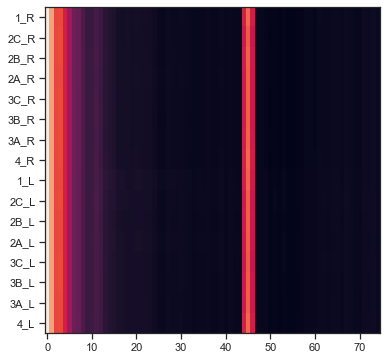

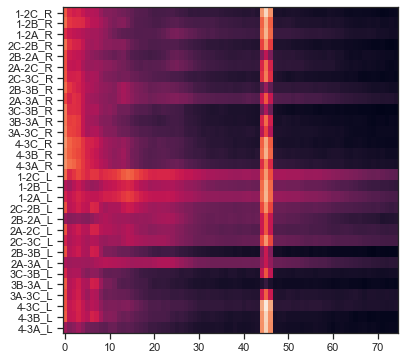

C:\Users\aleks\Downloads\data_pac\Patient9\Kulagina_ON_1_eyes_closed_marked_bip.fif
Duration:  303.904
(62, 607808)
Good segment duration:  303.904


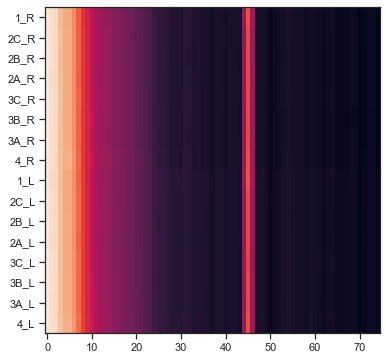

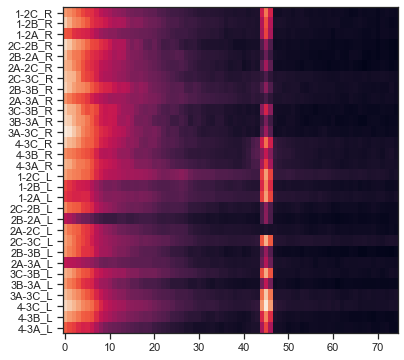

C:\Users\aleks\Downloads\data_pac\Patient9\Kulagina_ON_5_eyes_closed_marked_bip.fif
Duration:  285.929
(62, 570018)
Good segment duration:  285.009


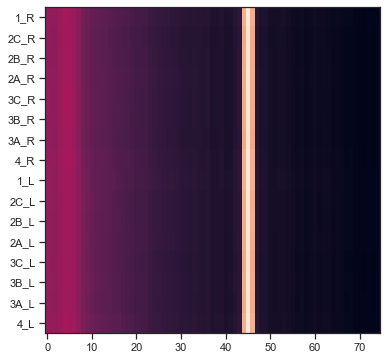

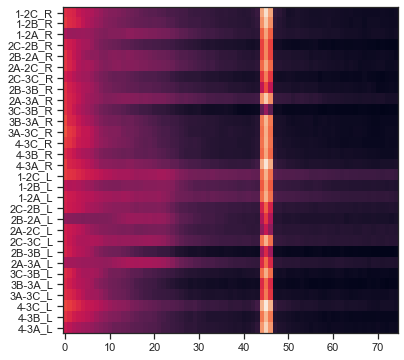

0


In [85]:
%matplotlib inline
good_durations = []

for i_patient in [7, 8, 9]:
    patient_path = data_path / f"Patient{i_patient}"
    for fname in [f for f in patient_path.iterdir()]:
        if "eyes_closed" in str(fname):
            print(fname)
            fpath = patient_path / fname
            raw = mne.io.read_raw_fif(fpath, verbose='ERROR')
            print("Duration: ", len(raw) / SFREQ)
            data = raw.get_data(reject_by_annotation='omit')
            print(data.shape)
            good_durations.append(data.shape[1] / SFREQ)
            print("Good segment duration: ", data.shape[1] / SFREQ)
            
            ch_names = raw.info.ch_names[-30:]
            
            # plotting correlations
            # corr = np.corrcoef(data[-30:])
            # plt.figure(figsize=(6, 6))
            # plt.imshow(corr, cmap='viridis', aspect='auto')   
            # plt.xticks(ticks=np.arange(30), labels=ch_names, rotation=90)
            # plt.yticks(ticks=np.arange(30), labels=ch_names)
            # plt.show()
            
            # plotting spectra of *monopolar* signals
            f0 = 5
            f1 = 80
            welch_kwargs={'window': 'hann', 'nperseg': SFREQ * 1, 'noverlap': None, 'nfft': None, 'detrend': 'constant', 'scaling': 'density'}
            f, y = sg.welch(data[9:25, :], SFREQ, **welch_kwargs)
            i0 = np.argmin(np.abs(f - f0)) 
            i1 = np.argmin(np.abs(f - f1)) 
            
            plt.figure(figsize=(6, 6))
            plt.imshow(np.log(y[:, i0:i1]), aspect='auto')
            plt.yticks(np.arange(y.shape[0]), raw.info['ch_names'][9:25])
            plt.show()
            
            # plotting spectra of *bipolar* signals
            f0 = 5
            f1 = 80
            welch_kwargs={'window': 'hann', 'nperseg': SFREQ * 1, 'noverlap': None, 'nfft': None, 'detrend': 'constant', 'scaling': 'density'}
            f, y = sg.welch(data[-30:, :], SFREQ, **welch_kwargs)
            i0 = np.argmin(np.abs(f - f0)) 
            i1 = np.argmin(np.abs(f - f1)) 
            
            plt.figure(figsize=(6, 6))
            plt.imshow(np.log(y[:, i0:i1]), aspect='auto')
            plt.yticks(np.arange(y.shape[0]), raw.info['ch_names'][-30:])
            plt.show()
            
            
good_durations = np.array(good_durations)
print(np.sum(good_durations < 180))

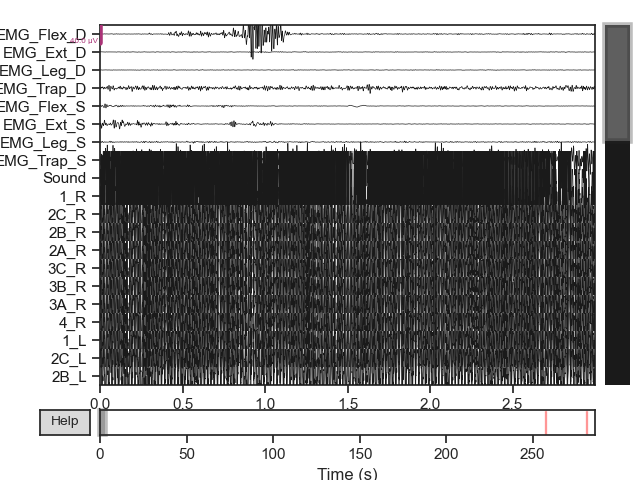

In [15]:
%matplotlib widget
raw.plot(duration=3);

1. Create a patient object with empty LFP and PAC
2. Loop through MNE files for the patient (eyes closed), extract data
3. Loop through the bipolar channel data
4. Create LFP + preprocess
5. Assign LFP to the patient

In [14]:
raw.info.ch_names[-30:]

['1-2C_R',
 '1-2B_R',
 '1-2A_R',
 '2C-2B_R',
 '2B-2A_R',
 '2A-2C_R',
 '2C-3C_R',
 '2B-3B_R',
 '2A-3A_R',
 '3C-3B_R',
 '3B-3A_R',
 '3A-3C_R',
 '4-3C_R',
 '4-3B_R',
 '4-3A_R',
 '1-2C_L',
 '1-2B_L',
 '1-2A_L',
 '2C-2B_L',
 '2B-2A_L',
 '2A-2C_L',
 '2C-3C_L',
 '2B-3B_L',
 '2A-3A_L',
 '3C-3B_L',
 '3B-3A_L',
 '3A-3C_L',
 '4-3C_L',
 '4-3B_L',
 '4-3A_L']

### Creating patient objects

In [26]:
# create Patient object
SFREQ = 2000
patients = []

for i_patient in [7, 8, 9]:

    patient_name = f"Patient{i_patient}"
    patient_dir = data_path / patient_name
    print(patient_dir)

    patient = Patient(patient_name, patient_dir, sampling_frequency=SFREQ)
    patient.conditions = set(["1Day OFF Rest", "1Day ON Rest", "5Day OFF Rest", "5Day ON Rest"])
    # changing channel names into the standard ones (L2A-3A)
    ch_names = raw.info.ch_names[-30:]
    get_new_name = lambda s: s.split("_")[1] + s.split("_")[0] # 'L' + "2A-3A"
    sorted_placements = list(map(get_new_name, ch_names))
    patient.sorted_placements = sorted_placements
    patient.placements = set(sorted_placements)

    print(patient.sorted_placements)

    for fpath in patient_dir.iterdir():
        patient.add_file(fpath.name)

    print(patient.files)
    patients.append(patient)

C:\Users\aleks\Downloads\data_pac\Patient7
List of things to make sure before analysis: 
1) .bdf files are in patient folder (root_dir)
2) annotation files share the same name as .bdf files but with _annotations.txt suffix
3) annotations share the same naming principle: e.g. 1Day OFF RH (Com)
['R1-2C', 'R1-2B', 'R1-2A', 'R2C-2B', 'R2B-2A', 'R2A-2C', 'R2C-3C', 'R2B-3B', 'R2A-3A', 'R3C-3B', 'R3B-3A', 'R3A-3C', 'R4-3C', 'R4-3B', 'R4-3A', 'L1-2C', 'L1-2B', 'L1-2A', 'L2C-2B', 'L2B-2A', 'L2A-2C', 'L2C-3C', 'L2B-3B', 'L2A-3A', 'L3C-3B', 'L3B-3A', 'L3A-3C', 'L4-3C', 'L4-3B', 'L4-3A']
{'Akhmetshin_OFF_1_eyes_opened_marked_bip.fif', 'Akhmetshin_ON_1_eyes_closed_marked_bip.fif', 'pac', 'Akhmetshin_OFF_5_eyes_opened_marked_bip.fif', 'Akhmetshin_OFF_5_eyes_closed_marked_bip.fif', 'Akhmetshin_ON_1_eyes_opened_marked_bip.fif', 'Akhmetshin_ON_5_eyes_opened_marked_bip.fif', 'Akhmetshin_ON_5_eyes_opened_marked_bip_cropped.fif', 'im', 'Patient7.pkl', 'Akhmetshin_OFF_1_eyes_closed_marked_bip.fif', 'Akhmet

### Filling patient objects with LFPs

In [120]:
%%time

# prepare LFPs and save patient
for q, patient in zip([18, 40, 55], patients):
    for f in patient.root_dir.iterdir():
        print(f.name)
        if 'eyes_closed' in f.name:
            name, ldopa, day = f.name.split('_')[:3]
            raw = mne.io.read_raw_fif(f, verbose='ERROR')
            print("Duration: ", len(raw) / SFREQ)
            data = raw.get_data(reject_by_annotation='omit')
            print(data.shape)
            condition = create_condition_name(f"{day}Day", ldopa, "Rest")
            print(condition)
            for i_chan in range(len(patient.placements)):
                placement = patient.sorted_placements[i_chan]
                data_lfp = data[-30 + i_chan, :]
                lfp = LFP(data_lfp, 
                          sampling_frequency=SFREQ,
                          patient_name=patient.name, 
                          condition=condition, 
                          placement=placement)
                
                lfp.remove_50hz_harmonics(q, inplace=True)
                lfp.bp_filter(4, 499, inplace=True, filter_order=3)
                patient.add_lfp(lfp, verbose=False)
                
            patient.merge_conditions([condition], condition + " 180sec", total_duration=180, remove_merged=True)
    patient.save()

Akhmetshin_OFF_1_eyes_closed_marked_bip.fif
Duration:  277.854
(62, 555708)
1Day OFF Rest
Adding LFP to Patient7 object. 
Condition: 1Day OFF Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_OFF_1_eyes_opened_marked_bip.fif
Akhmetshin_OFF_5_eyes_closed_marked_bip.fif
Duration:  212.753
(62, 401526)
5Day OFF Rest
Adding LFP to Patient7 object. 
Condition: 5Day OFF Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_OFF_5_eyes_opened_marked_bip.fif
Akhmetshin_ON_1_eyes_closed_marked_bip.fif
Duration:  368.204
(62, 624168)
1Day ON Rest
Adding LFP to Patient7 object. 
Condition: 1Day ON Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_ON_1_eyes_opened_marked_bip.fif
Akhmetshin_ON_5_eyes_closed_marked_bip.fif
Duration:  320.579
(62, 478218)
5Day ON Rest
Adding LFP to Patient7 object. 
Condition: 5Day ON Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_ON_5_eyes_opened_marked_bip.fif
Akhmetshin_ON_5_eyes_opened_marked_bip_cropped.fif
im
pac
Patien

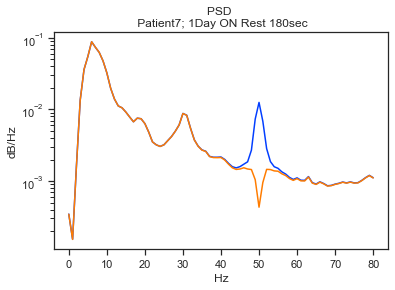

In [116]:
lfp = patients[0].lfp["1Day ON Rest 180sec"]["L4-3B"].copy()
lfp.show_psd([0, 80], log=True)

lfp.remove_50hz_harmonics(25, inplace=True)
lfp.show_psd([0, 80], log=True)

### Spectra

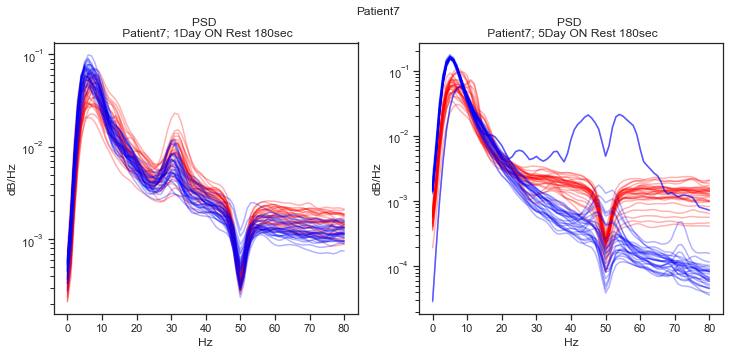

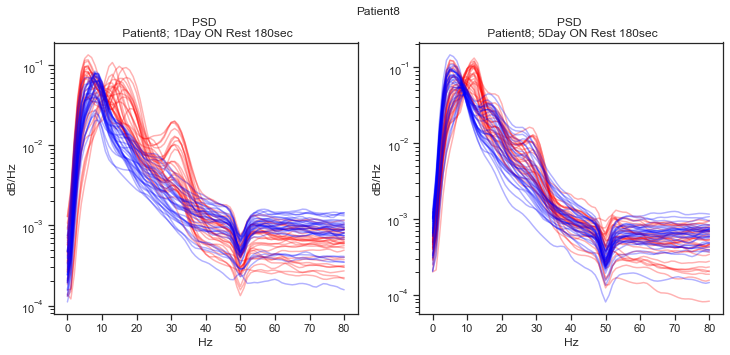

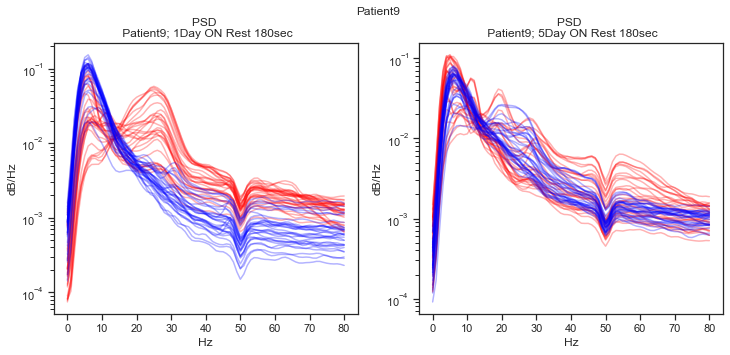

In [121]:
%matplotlib inline
colors = {"OFF": 'red', "ON": 'blue'}

for patient in patients:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.suptitle(patient.name)
    patient.psd = {}   # condition: array of PSDs
    for i, day in enumerate(["1Day", "5Day"]):
        ax = axes[i]
        for ldopa in ['OFF', 'ON']:
            condition = create_condition_name(day, ldopa, "Rest 180sec")
            patient.psd[condition] = np.empty((len(patient.sorted_placements), 1001))
            for j, placement in enumerate(patient.sorted_placements):
                lfp = patient.lfp[condition][placement]
                lfp.data = (lfp.data - lfp.data.mean()) / lfp.data.std()
                lfp.show_psd([0, 80], log=True, smooth=True, sigma=1, color=colors[ldopa], alpha=0.3, ax=ax)
                psd_freqs, patient.psd[condition][j] = lfp.get_psd(smooth=True, sigma=2)

### Spectra imshow

Patient7



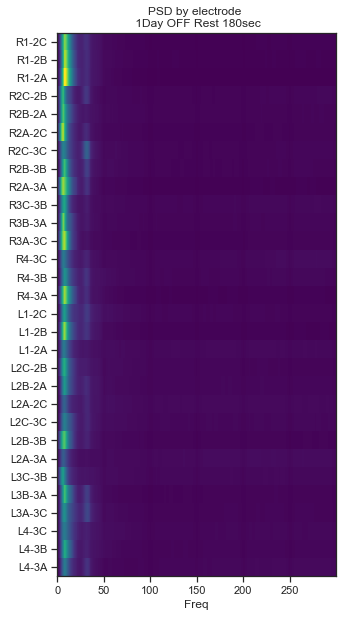

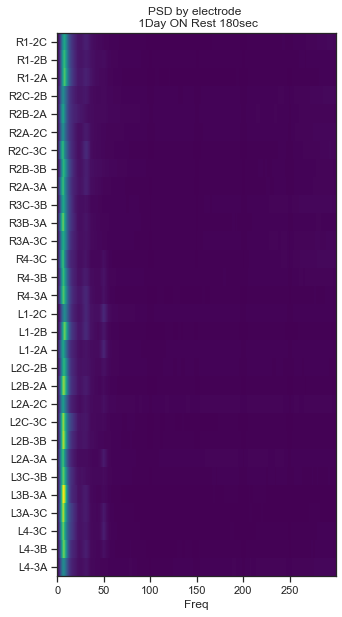

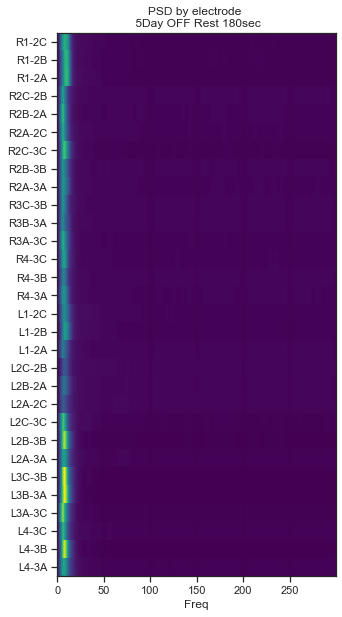

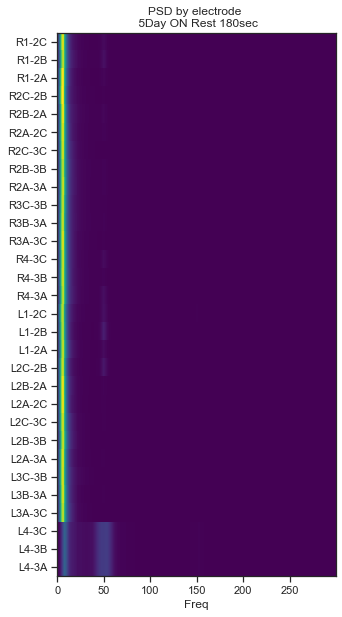

Patient8



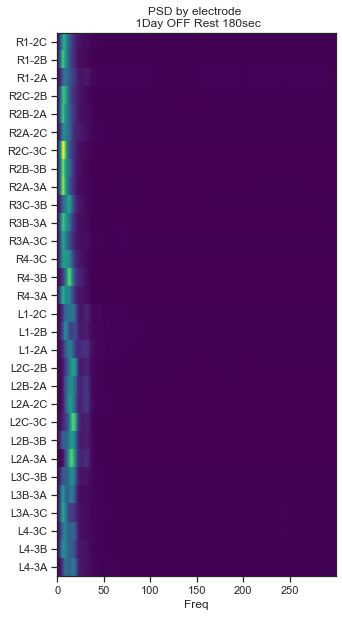

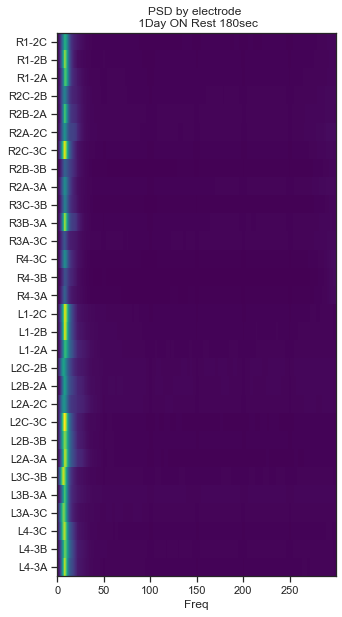

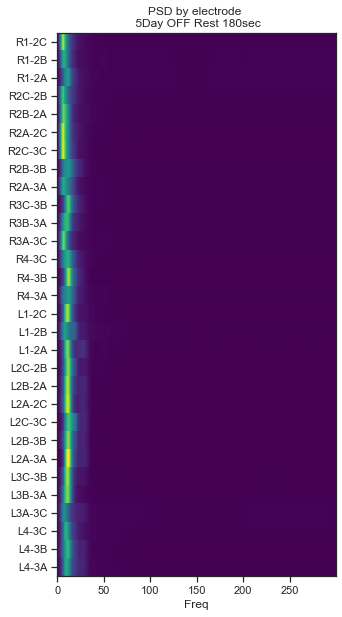

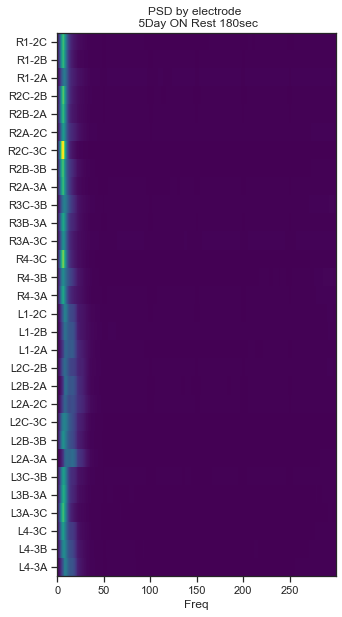

Patient9



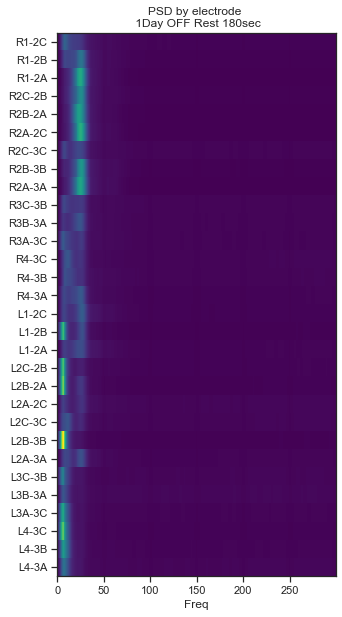

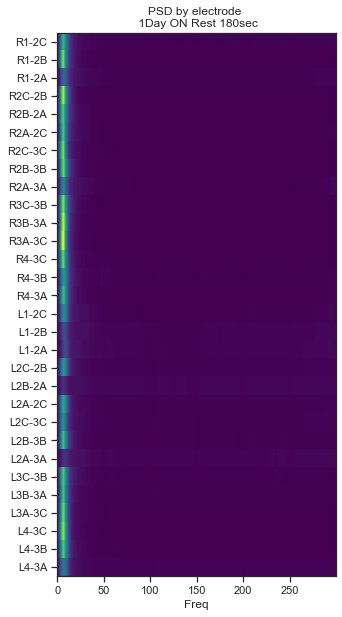

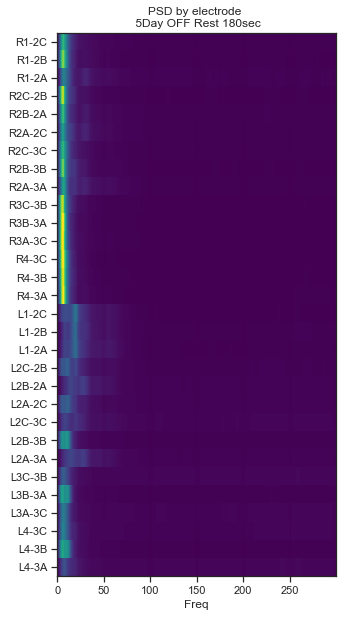

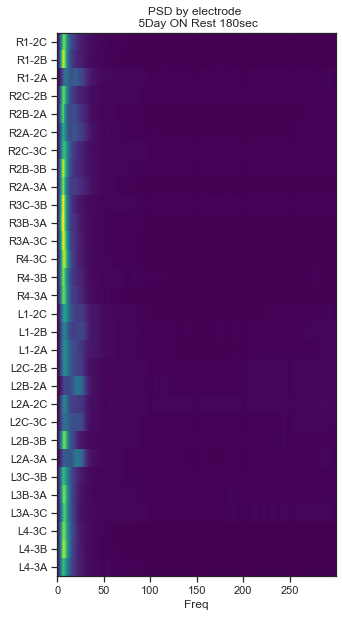

In [101]:
f0 = 300
i_f0 = np.argmin(np.abs(psd_freqs - f0))

for patient in patients:
    print(patient.name + "\n")
    for condition in patient.conditions:
        psds = patient.psd[condition]
        plt.figure(figsize=(5, 10))
        plt.title(f"PSD by electrode \n {condition}")
        plt.imshow(psds[:, :i_f0], cmap='viridis', aspect='auto', interpolation='none')
        plt.yticks(np.arange(30), patient.sorted_placements)
        #plt.grid()
        plt.xlabel("Freq")
        plt.show()